# LGM Data Science Internship
## Task 1 - Iris Flower Classification 

In [40]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv("https://raw.githubusercontent.com/ShalakaPawar/LGMVIP-DataScience/master/Beginner%20Level%20Tasks/Iris%20Flower%20Classification/iris.data", header=None)
data.columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Class"]
data.index+=1

In [42]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
data["Class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

# Data Visualization

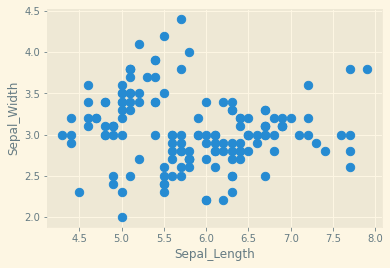

In [45]:
data.plot(kind="scatter", x = "Sepal_Length", y="Sepal_Width", s=70)
plt.show()

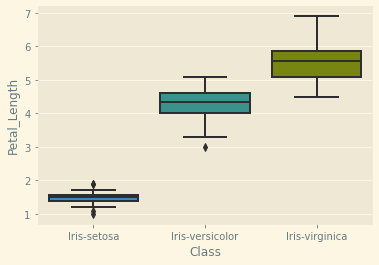

In [46]:
sns.boxplot(x="Class", y="Petal_Length", data=data )
plt.show()

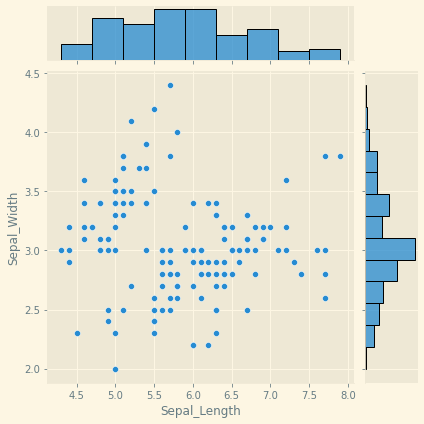

In [47]:
sns.jointplot(x = "Sepal_Length", y = "Sepal_Width",
              kind = "scatter", data = data)

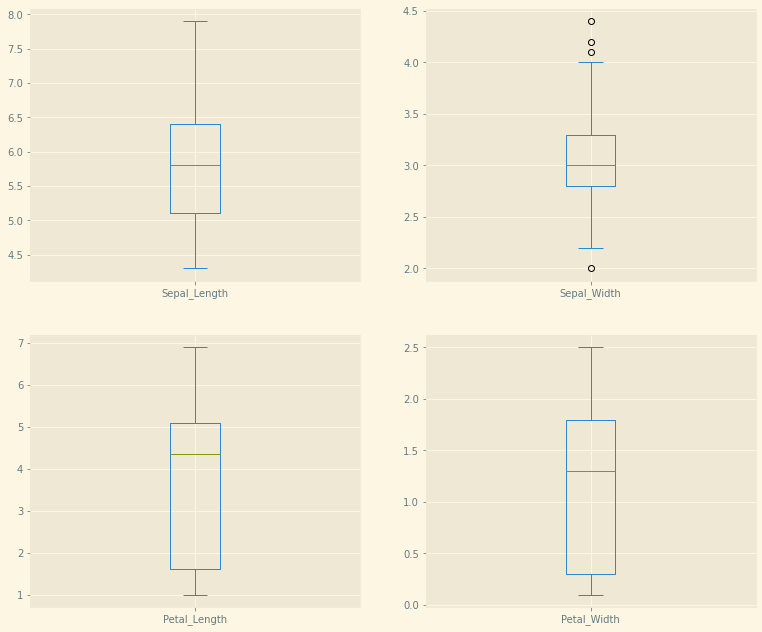

In [48]:
data.iloc[:, :-1].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(13,11))
plt.show()

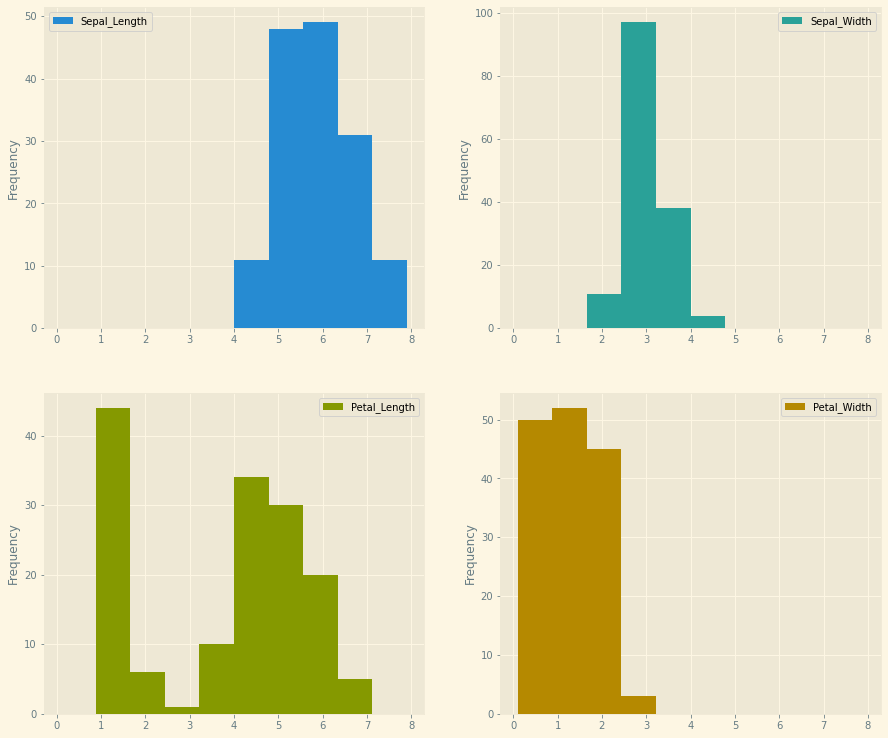

In [49]:
data.iloc[:, :-1].plot(kind='hist', subplots=True, layout = (2,2), sharex=False, sharey=False, figsize=(15,13))
plt.style.use("Solarize_Light2")
plt.show()

## Heatmap

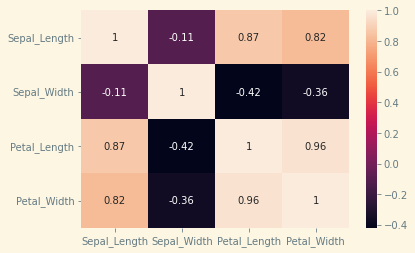

In [50]:
sns.heatmap(data.iloc[:, :-1].corr(), annot=True)

In [51]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


# Label Encoding on Classes

In [52]:
data["Class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Class"] = le.fit_transform(data["Class"])

In [54]:
data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Train Test split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
print(Y_train.size, X_train.shape, X_test.shape,Y_test.shape)

100 (100, 4) (50, 4) (50,)


# Applying 6 Machine Learning Models

1. Logistic Regression (LR)

2. Linear Discriminate Analysis (LDA)

3. K-Nearest Neighbours (KNN)

4. Classification and Regression Trees (CRT)

5. Guassian Naive Bayes (GNN)

6. Support Vector Machine (SVM)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [58]:
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)
predictions = LogReg.predict(X_test)
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)*100
accuracy

100.0

In [60]:
import warnings
warnings.simplefilter('ignore')

In [61]:
from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(LogReg, X_train, Y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.        , 0.        , 0.        , 0.54772256, 0.31622777,
       0.        , 0.        , 0.        , 0.        , 0.31622777])

In [62]:
accuracy = accuracy_score(Y_test, predictions)*100
accuracy

100.0

In [63]:
models = []
models.append(["LogReg", LogisticRegression().fit(X_train, Y_train)])
models.append(["LDA", LinearDiscriminantAnalysis().fit(X_train, Y_train)])
models.append(["KNN", KNeighborsClassifier(n_neighbors = 7).fit(X_train, Y_train)])
models.append(["DecisionTree", DecisionTreeClassifier().fit(X_train, Y_train)])
models.append(["NaiveBayes", GaussianNB().fit(X_train, Y_train)])
models.append(["SVC", SVC().fit(X_train, Y_train)])
models.append(["RandomForest", RandomForestClassifier().fit(X_train, Y_train)])

In [64]:

results = []
names = []

# looping models in the list
for name, model in models:
    kfold = KFold(n_splits=10, random_state=53, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    predictions = model.predict(X_test)
    print(f"""{name}\nAccuracy: {cv_results.mean()}\nStd deviation: {cv_results.std()}\nConfusion Matrix:\n{confusion_matrix(Y_test, predictions)}\n""")


LogReg
Accuracy: 0.9400000000000001
Std deviation: 0.07999999999999999
Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]

LDA
Accuracy: 0.9800000000000001
Std deviation: 0.039999999999999994
Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

KNN
Accuracy: 0.93
Std deviation: 0.07810249675906653
Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

DecisionTree
Accuracy: 0.9099999999999999
Std deviation: 0.11357816691600549
Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

NaiveBayes
Accuracy: 0.93
Std deviation: 0.07810249675906653
Confusion Matrix:
[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]

SVC
Accuracy: 0.9299999999999999
Std deviation: 0.1004987562112089
Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]

RandomForest
Accuracy: 0.9199999999999999
Std deviation: 0.09797958971132713
Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

